In [1]:
library(tidyverse)
library(openxlsx)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()



# Chargement des données

In [2]:
data <- as_tibble(read.xlsx('../../data/interim/preprocessed.xlsx'))

In [3]:
head(data)

Nom.plante,Hauteur,Nbr.taille,Poids.frais,Poids.sec,I
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
2,68.625,7.25,14.250,2.76650,FALSE
5,75.375,3.25,11.250,2.30675,FALSE
8,88.750,4.50,16.000,3.40350,FALSE
9,79.500,3.75,9.875,1.90725,FALSE
13,83.375,4.00,14.250,2.94650,FALSE
16,90.875,4.50,16.125,3.44700,FALSE


In [4]:
colnames(data)

[1] "Nom.plante"  "Hauteur"     "Nbr.taille"  "Poids.frais" "Poids.sec"  
[6] "I"

# Analyse des distributions

## Hauteurs

**Est-ce que l'inoculation a un effet ?**
   * Distribution normale?
   * Homogénéité des variances?

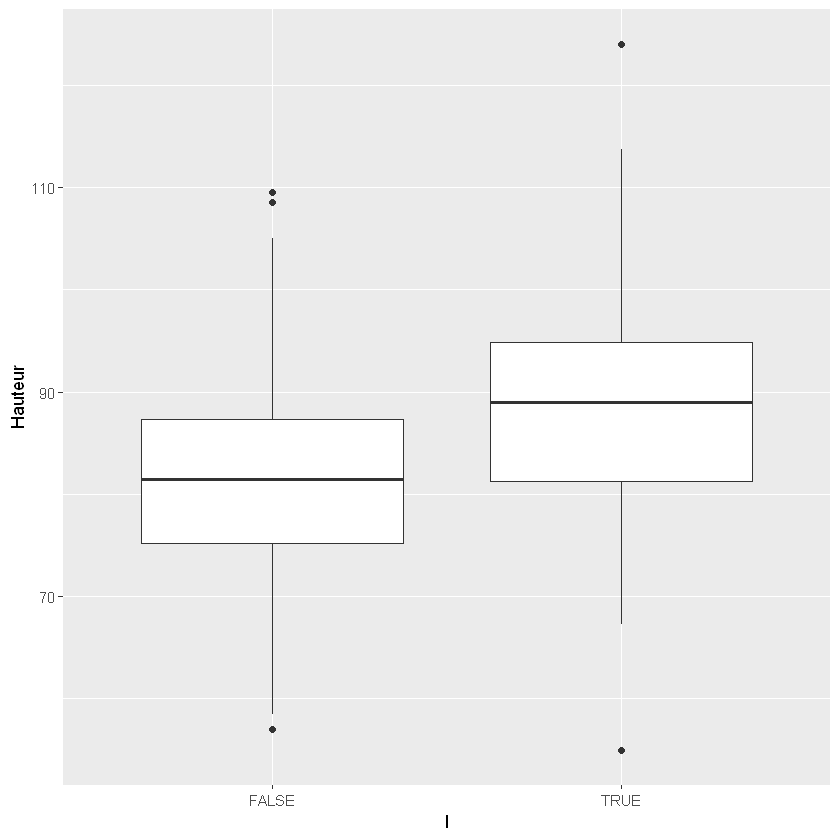

In [5]:
ggplot(data) + geom_boxplot(aes(y= Hauteur, x=I))

Il semble que les moyennes soit différentes en fonction de l'inoculation

### Test de normalité

H$_0$ l'échantillon provient d'une distribution normale

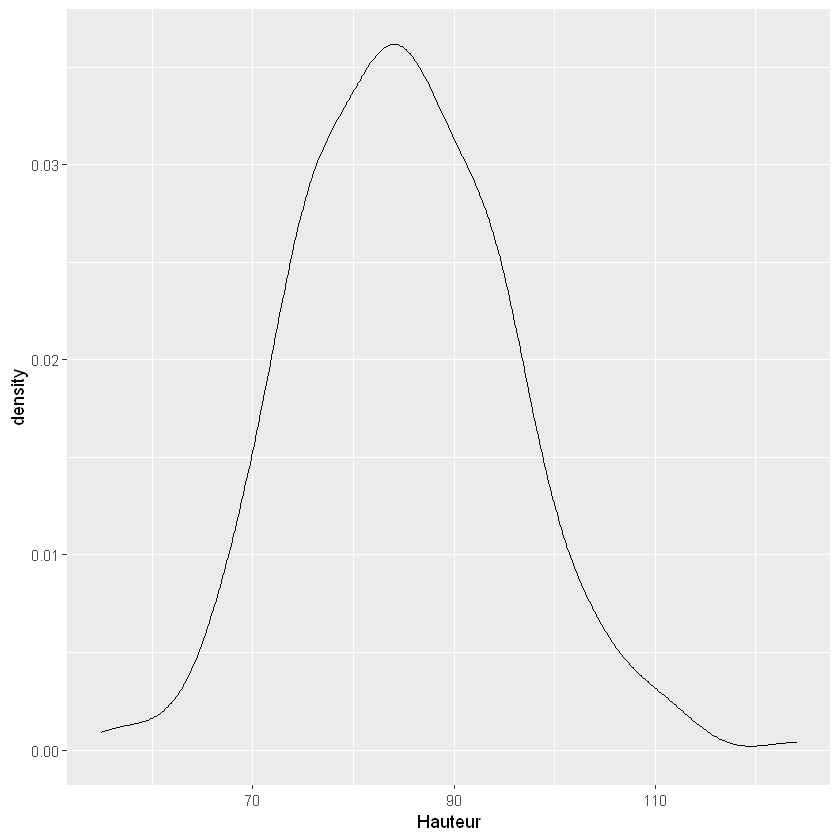

In [6]:
ggplot(data) + geom_density(kernel='gaussian', aes(x=Hauteur))

In [7]:
shapiro.test(data$Hauteur)


	Shapiro-Wilk normality test

data:  data$Hauteur
W = 0.99524, p-value = 0.3513


p-value > $\alpha$ (0,05) $\rightarrow$ H$_0$ ne peut pas être rejeté

La distribution semble issue d'une distribution normale

### Homogénéité des variances

H$_0$ : $\sigma_1$ = $\sigma_2$

H$_a$ : $\sigma_1$ $\ne$$\sigma_2$

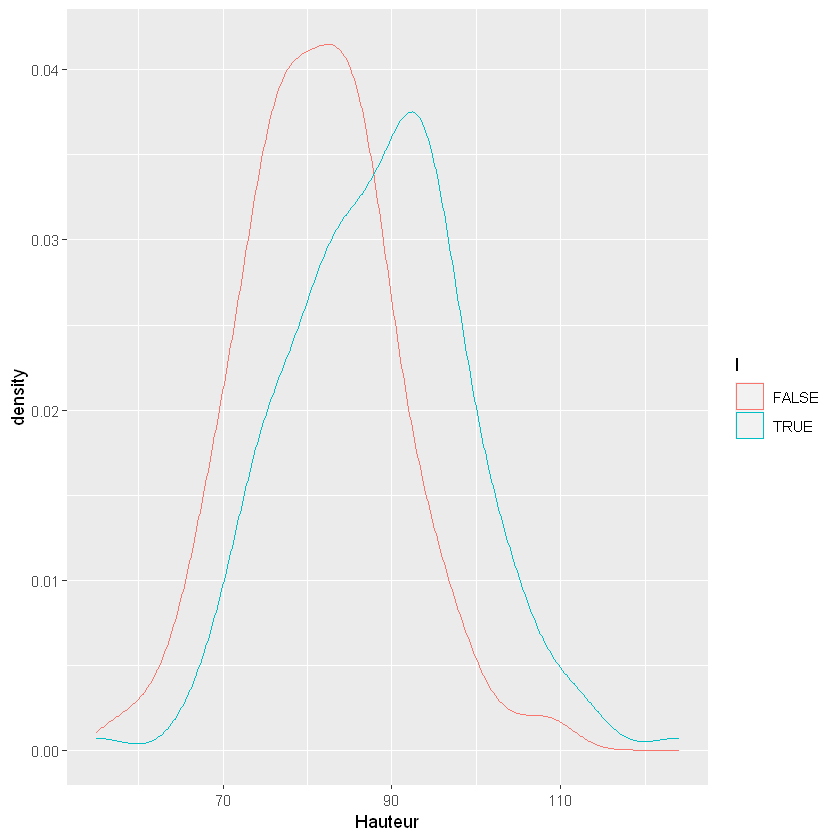

In [8]:
ggplot(data, aes(x=Hauteur, color=I)) + geom_density(kernel='gaussian')

In [9]:
bartlett.test(Hauteur ~ I, data=data)


	Bartlett test of homogeneity of variances

data:  Hauteur by I
Bartlett's K-squared = 3.3336, df = 1, p-value = 0.06788


### Les moyennes sont-elles différentes?

H$_0$ $\mu_1$ = $\mu_2$

H$_a$ $\mu_1$ $\ne$$\mu_2$

In [32]:
kruskal.test(Hauteur ~ I, data=data)


	Kruskal-Wallis rank sum test

data:  Hauteur by I
Kruskal-Wallis chi-squared = 42.148, df = 1, p-value = 8.46e-11


## Poids sec

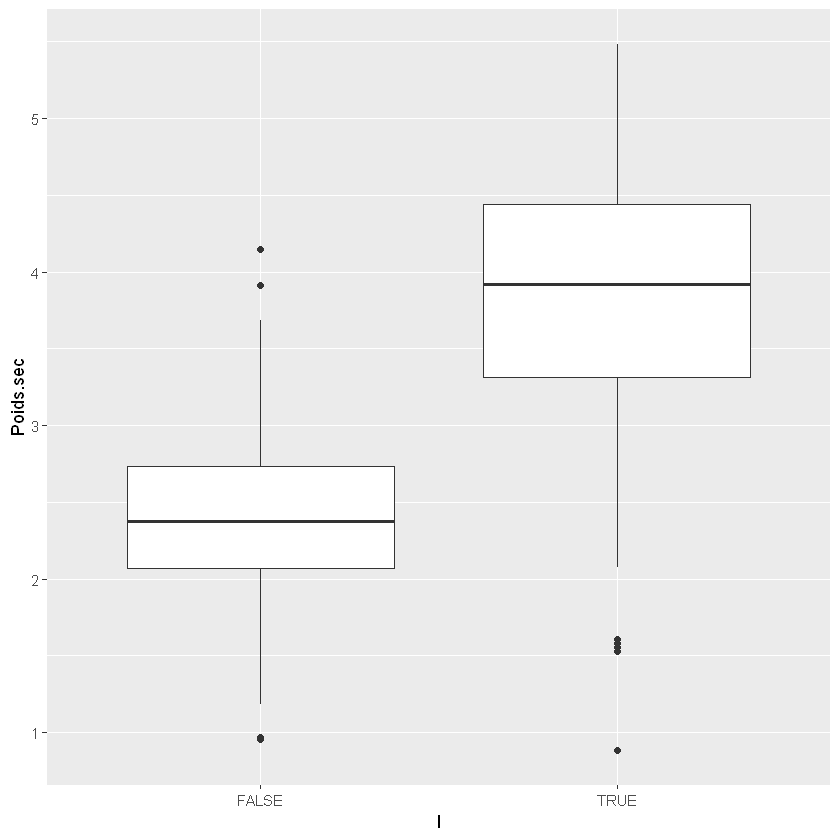

In [11]:
ggplot(data) + geom_boxplot(aes(y= Poids.sec, x=I))

Les distributions semblent contenir des outliers

In [12]:
I = data[ which(data$I == TRUE), ]
NI = data[ which(data$I == FALSE), ]

In [13]:
Q_I <- quantile(I$Poids.sec, probs=c(.25, .75))
Q_I

25%      75% 
3.313333 4.440000

In [14]:
iqr_I <- IQR(I$Poids.sec)
iqr_I

[1] 1.126667

In [15]:
up_I = Q_I[2] + 1.5 * iqr_I
low_I = Q_I[1] - 1.5 * iqr_I
up_I
low_I

75% 
6.13

25% 
1.623333

In [16]:
Q_NI <- quantile(NI$Poids.sec, probs=c(.25, .75))
Q_NI

25%    75% 
2.0680 2.7315

In [17]:
iqr_NI <- IQR(NI$Poids.sec)
iqr_NI

[1] 0.6635

In [18]:
up_NI = Q_NI[2] + 1.5 * iqr_NI
low_NI = Q_NI[1] - 1.5 * iqr_NI
up_NI
low_NI

75% 
3.72675

25% 
1.07275

In [19]:
I_NO <- subset(I, Poids.sec > low_I & Poids.sec < up_I)

In [20]:
NI_NO <- subset(NI, Poids.sec > low_NI & Poids.sec < up_NI)

In [21]:
data_NO <- rbind(NI_NO, I_NO)

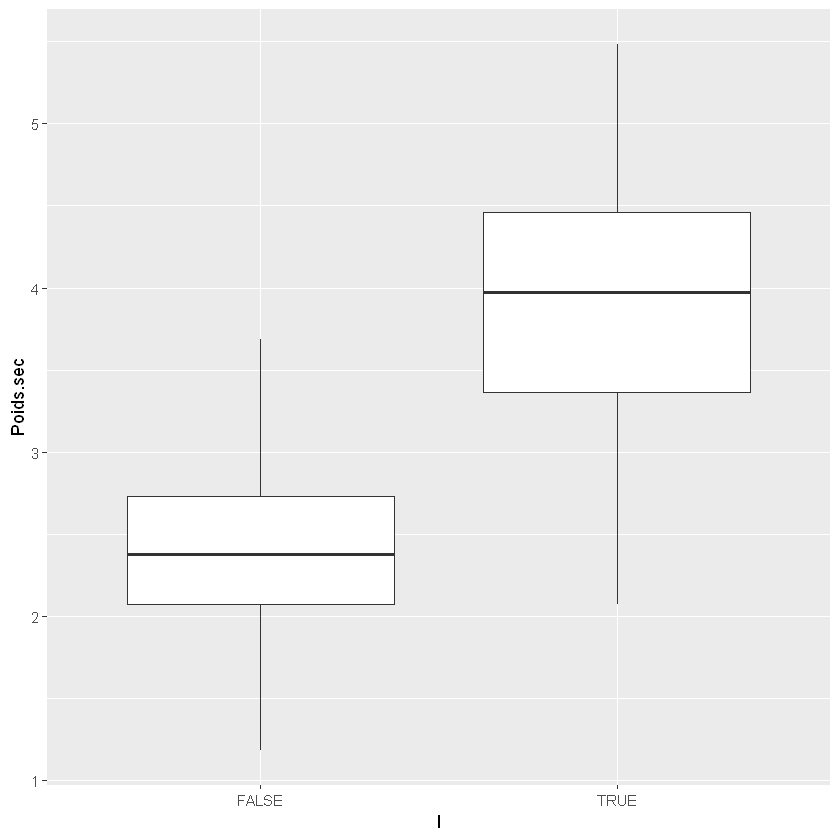

In [22]:
ggplot(data_NO) + geom_boxplot(aes(y= Poids.sec, x=I))

### Test de normalité

H$_0$ l'échantillon provient d'une distribution normale

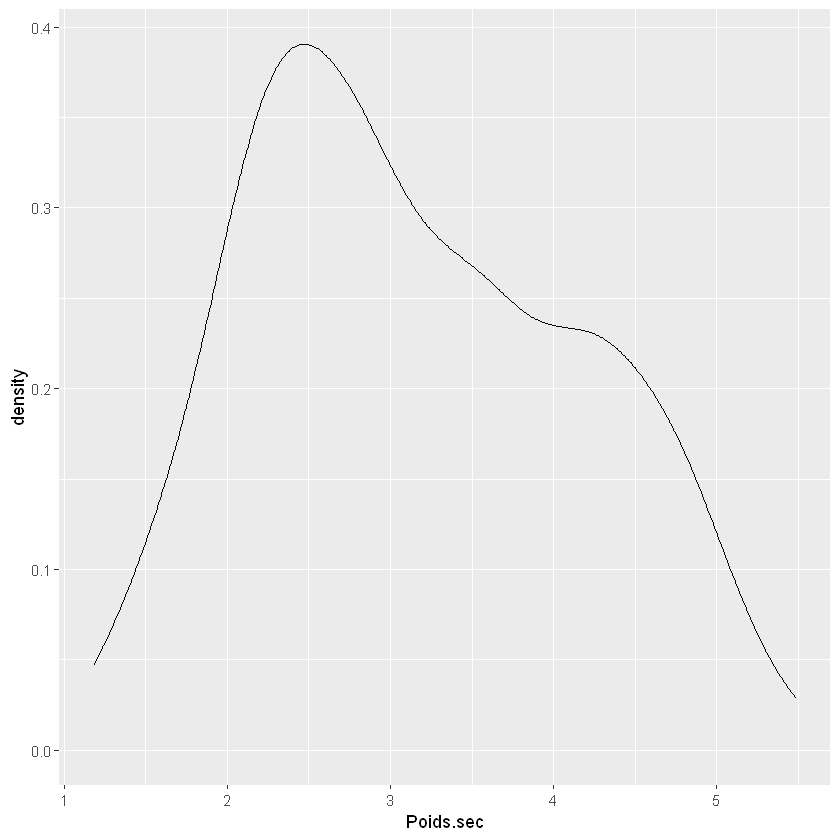

In [23]:
ggplot(data_NO) + geom_density(kernel='gaussian', aes(x=Poids.sec))

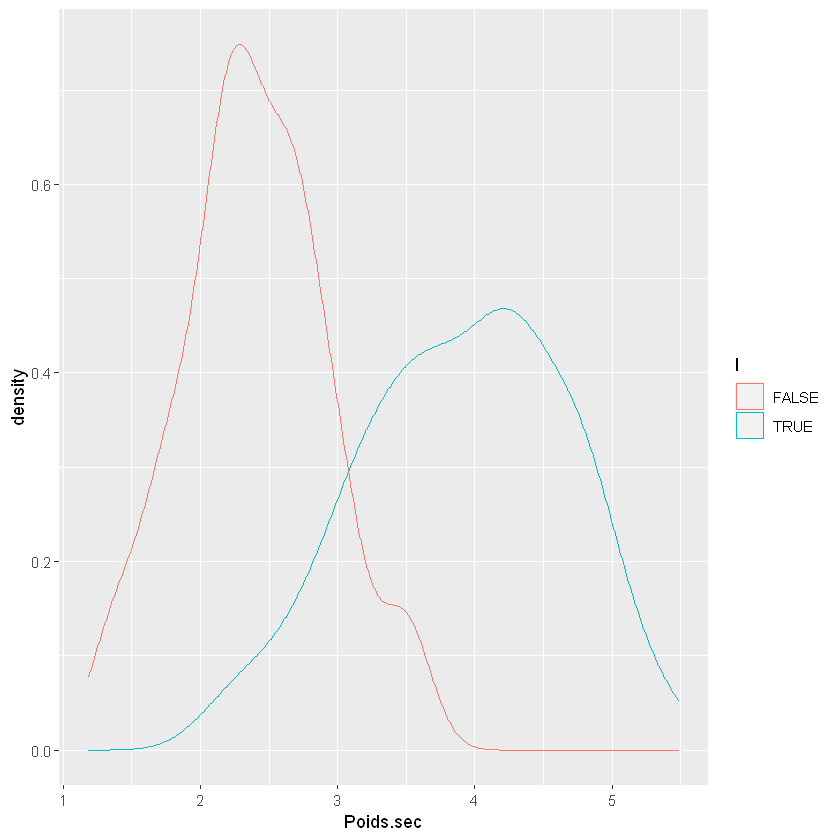

In [24]:
ggplot(data_NO, aes(x=Poids.sec, color=I)) + geom_density(kernel='gaussian')

In [25]:
shapiro.test(data_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  data_NO$Poids.sec
W = 0.97075, p-value = 1.944e-06


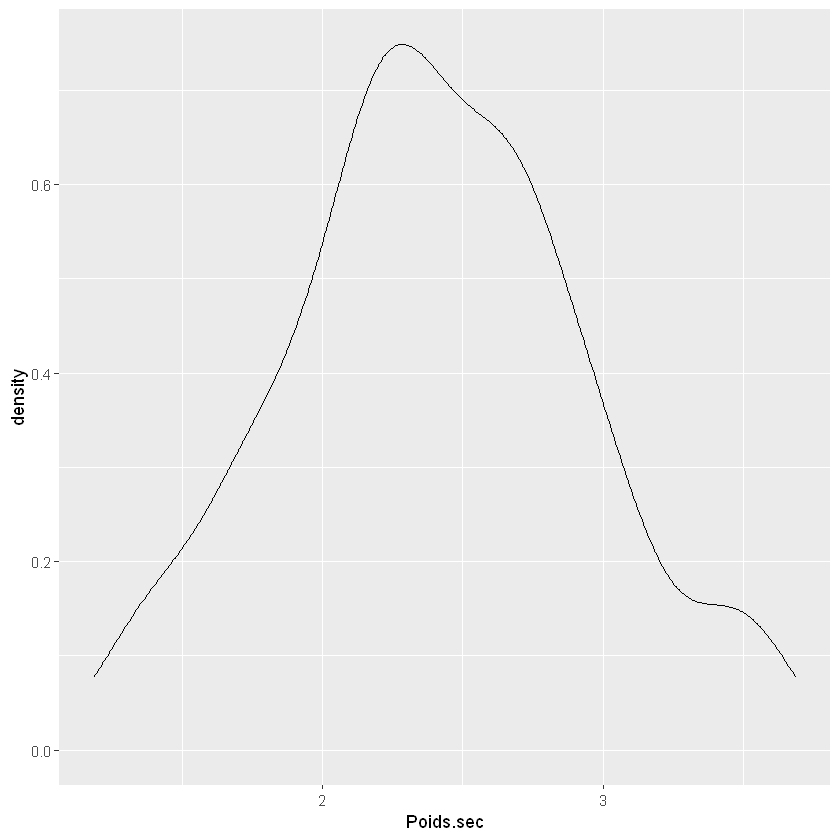

In [26]:
ggplot(NI_NO) + geom_density(kernel='gaussian', aes(x = Poids.sec))

In [27]:
shapiro.test(NI_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  NI_NO$Poids.sec
W = 0.99188, p-value = 0.4405


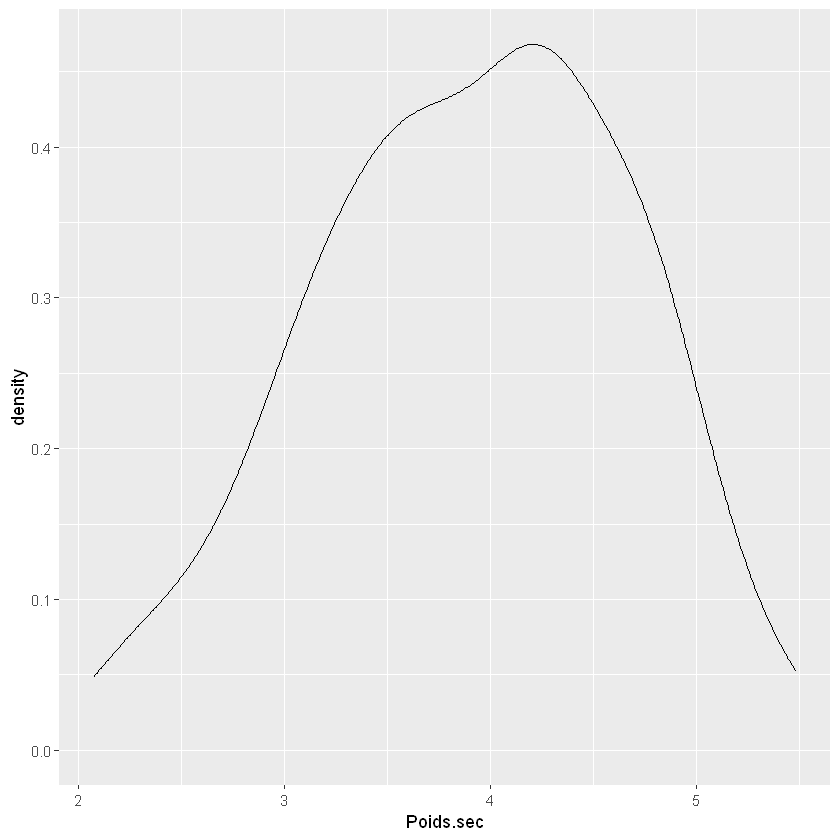

In [28]:
ggplot(I_NO) + geom_density(kernel='gaussian', aes(x = Poids.sec))

In [29]:
shapiro.test(I_NO$Poids.sec)


	Shapiro-Wilk normality test

data:  I_NO$Poids.sec
W = 0.98629, p-value = 0.091


### Homogénéité des variances (homoscédasticité)

In [30]:
bartlett.test(Poids.sec ~ I, data=data)


	Bartlett test of homogeneity of variances

data:  Poids.sec by I
Bartlett's K-squared = 25.636, df = 1, p-value = 4.122e-07


### Les moyennes sont-elles différentes?

In [31]:
kruskal.test(Poids.sec ~ I, data=data)


	Kruskal-Wallis rank sum test

data:  Poids.sec by I
Kruskal-Wallis chi-squared = 182.27, df = 1, p-value < 2.2e-16


In [33]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     